In [4]:
# Exploring thhe Whale Activities

# loading whale transsfer from DB
import sqlite3
import pandas as pd

# Load data
conn = sqlite3.connect("../data/blockchain.db")
whales_df = pd.read_sql("SELECT * FROM whale_transfers;", conn)
conn.close()

print(whales_df.head())
print(whales_df.info())

         amount                                from_address  \
0  2.000000e+06  0xf8824bc0768670ef2b8bc32e824edc3f9505698e   
1  1.003928e+06  0x1f2f10d1c40777ae1da742455c65828ff36df387   
2  1.002983e+06  0xe0e0e08a6a4b9dc7bd67bcb7aade5cf48157d444   
3  1.000000e+07  0x55fe002aeff02f77364de339a1292923a15844b8   
4  5.882363e+06  0xb7b41ec99a8a8a5fbec0785dc8ae2f99f580c728   

                     timestamp                                  to_address  \
0  2025-09-16 11:46:47.000 UTC  0xb156cdc31a7fa54c72c79c5cdc51501ca233854a   
1  2025-09-16 11:46:47.000 UTC  0xe0e0e08a6a4b9dc7bd67bcb7aade5cf48157d444   
2  2025-09-16 11:46:47.000 UTC  0x1f2f10d1c40777ae1da742455c65828ff36df387   
3  2025-09-16 11:46:23.000 UTC  0x0000000000000000000000000000000000000000   
4  2025-09-16 11:46:23.000 UTC  0x23878914efe38d27c4d67ab83ed1b93a74d4086a   

  token                                            tx_hash  
0  USDT  0xbd10a5e6af73466c1b2a6fa1dad6e69de3809cd3f753...  
1  USDC  0x7732ea00ce9d84e00b4

In [5]:
# Basic Summary Stats
# Number of transactions per token
print(whales_df['token'].value_counts())

# Biggest single whale transaction
print(whales_df.loc[whales_df['amount'].idxmax()])

# Total value moved per token
print(whales_df.groupby('token')['amount'].sum())

token
USDC    1630
USDT    1268
ETH      102
Name: count, dtype: int64
amount                                                700000000.0
from_address           0x23878914efe38d27c4d67ab83ed1b93a74d4086a
timestamp                             2025-09-16 10:05:47.000 UTC
to_address             0x18709e89bd403f470088abdacebe86cc60dda12e
token                                                        USDT
tx_hash         0xfc09824057307c8c151cd3fcf94da8f75849b1367fc2...
Name: 423, dtype: object
token
ETH     3.653413e+05
USDC    1.107208e+10
USDT    6.239504e+09
Name: amount, dtype: float64


In [6]:
# Time-based Patterns
# Ensure timestamp is datetime
whales_df['timestamp'] = pd.to_datetime(whales_df['timestamp'])

# Transactions per day
tx_per_day = whales_df.groupby(whales_df['timestamp'].dt.date).size()
print(tx_per_day)

# Total whale value per day
value_per_day = whales_df.groupby(whales_df['timestamp'].dt.date)['amount'].sum()
print(value_per_day)

timestamp
2025-09-15     438
2025-09-16    2562
dtype: int64
timestamp
2025-09-15    3.220097e+09
2025-09-16    1.409185e+10
Name: amount, dtype: float64


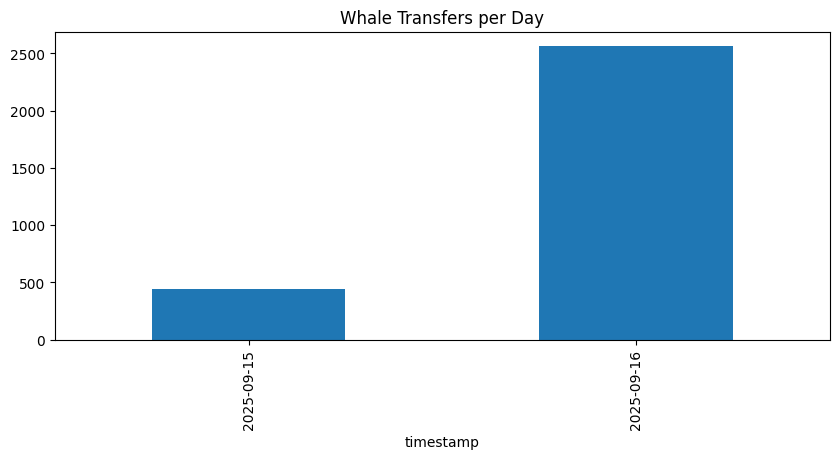

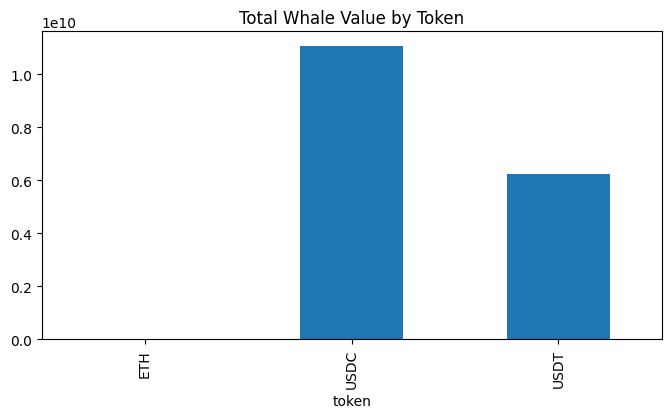

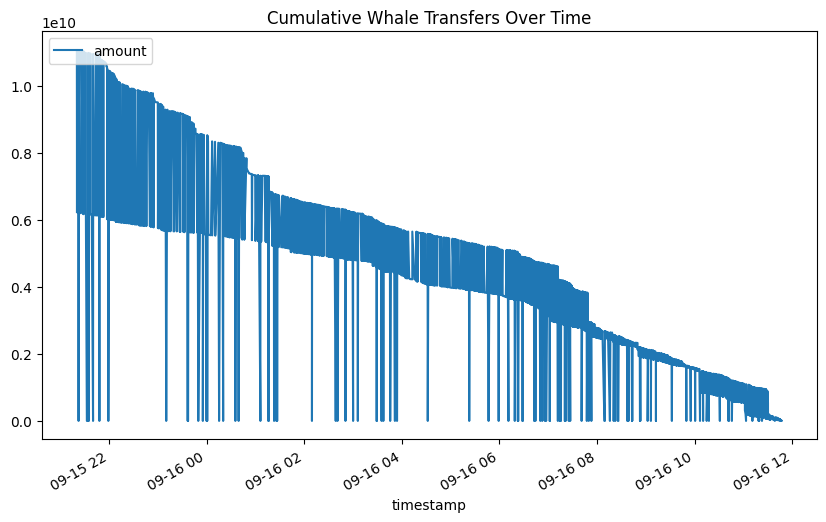

In [7]:
# Visualization
import matplotlib.pyplot as plt

# Plot whale transaction count per day
tx_per_day.plot(kind="bar", figsize=(10,4), title="Whale Transfers per Day")
plt.show()

# Plot total value moved per token
whales_df.groupby("token")["amount"].sum().plot(
    kind="bar", figsize=(8,4), title="Total Whale Value by Token"
)
plt.show()

# Value trend over time
whales_df.set_index("timestamp").groupby("token")["amount"].cumsum().plot(
    figsize=(10,6), title="Cumulative Whale Transfers Over Time"
)
plt.legend(loc='upper left')  # Add legend for tokens
plt.show()

In [8]:
# Detect Outliers (Suspiciously large transfer)
# Flag transfers above $50M
suspicious = whales_df[whales_df['amount'] > 50_000_000]
print("🚨 Large whale transfers detected:")
print(suspicious[['timestamp', 'token', 'from_address', 'to_address', 'amount']])


🚨 Large whale transfers detected:
                     timestamp token  \
72   2025-09-16 11:30:11+00:00  USDC   
73   2025-09-16 11:30:11+00:00  USDC   
74   2025-09-16 11:29:35+00:00  USDC   
75   2025-09-16 11:29:35+00:00  USDC   
192  2025-09-16 11:01:47+00:00  USDT   
193  2025-09-16 11:01:47+00:00  USDT   
194  2025-09-16 11:01:47+00:00  USDT   
423  2025-09-16 10:05:47+00:00  USDT   
770  2025-09-16 08:49:47+00:00  USDC   
771  2025-09-16 08:49:47+00:00  USDC   
919  2025-09-16 08:18:23+00:00  USDC   
1028 2025-09-16 07:48:23+00:00  USDC   
1029 2025-09-16 07:48:23+00:00  USDC   
1030 2025-09-16 07:48:23+00:00  USDC   
1031 2025-09-16 07:48:23+00:00  USDC   
1202 2025-09-16 07:11:59+00:00  USDC   
1203 2025-09-16 07:11:59+00:00  USDC   
1233 2025-09-16 07:03:11+00:00  USDT   
1257 2025-09-16 06:58:47+00:00  USDT   
1299 2025-09-16 06:44:11+00:00  USDT   
1411 2025-09-16 06:24:35+00:00  USDC   
1993 2025-09-16 03:22:23+00:00  USDT   
2306 2025-09-16 01:42:47+00:00  USDT   
2397 2

In [9]:

# Price range and Whale range
conn = sqlite3.connect("../data/blockchain.db")
print("Price range:", pd.read_sql("SELECT MIN(timestamp), MAX(timestamp) FROM prices", conn))
print("Whale range:", pd.read_sql("SELECT MIN(timestamp), MAX(timestamp) FROM whale_transfers", conn))
conn.close()


Price range:               MIN(timestamp)             MAX(timestamp)
0  2021-08-12 00:00:00+00:00  2025-09-19 10:00:00+00:00
Whale range:                 MIN(timestamp)               MAX(timestamp)
0  2025-09-15 21:20:23.000 UTC  2025-09-16 11:46:47.000 UTC


In [10]:

# Overlaying
# Loadinging both datasets from DB
conn = sqlite3.connect("../data/blockchain.db")

# Load whale transfers
whales_df = pd.read_sql("SELECT * FROM whale_transfers;", conn)

# Load price data
prices_df = pd.read_sql("SELECT * FROM prices;", conn)

conn.close()

# Print columns and head
print(whales_df.columns)
print(whales_df.head(5))

Index(['amount', 'from_address', 'timestamp', 'to_address', 'token',
       'tx_hash'],
      dtype='object')
         amount                                from_address  \
0  2.000000e+06  0xf8824bc0768670ef2b8bc32e824edc3f9505698e   
1  1.003928e+06  0x1f2f10d1c40777ae1da742455c65828ff36df387   
2  1.002983e+06  0xe0e0e08a6a4b9dc7bd67bcb7aade5cf48157d444   
3  1.000000e+07  0x55fe002aeff02f77364de339a1292923a15844b8   
4  5.882363e+06  0xb7b41ec99a8a8a5fbec0785dc8ae2f99f580c728   

                     timestamp                                  to_address  \
0  2025-09-16 11:46:47.000 UTC  0xb156cdc31a7fa54c72c79c5cdc51501ca233854a   
1  2025-09-16 11:46:47.000 UTC  0xe0e0e08a6a4b9dc7bd67bcb7aade5cf48157d444   
2  2025-09-16 11:46:47.000 UTC  0x1f2f10d1c40777ae1da742455c65828ff36df387   
3  2025-09-16 11:46:23.000 UTC  0x0000000000000000000000000000000000000000   
4  2025-09-16 11:46:23.000 UTC  0x23878914efe38d27c4d67ab83ed1b93a74d4086a   

  token                                   

In [11]:
# Ensure timestamps are datetime64[ns, UTC]
whales_df["timestamp"] = pd.to_datetime(whales_df["timestamp"], utc=True)
prices_df["timestamp"] = pd.to_datetime(prices_df["timestamp"], utc=True)

# Inspect tokens first
print("Unique tokens in whales_df:", whales_df["token"].unique())

# Ensure token/asset mapping is applied
mapping = {
    "ETH": "ethereum",
    "WETH": "bitcoin",
    "USDT": "tether",
    "USDC": "usd-coin",
    "BTC": "bitcoin",
    "WBTC": "bitcoin"
}
whales_df["token"] = whales_df["token"].map(mapping)

# Rename in prices so both sides align
prices_df = prices_df.rename(columns={"asset": "token"})

# Force token to string dtype
whales_df["token"] = whales_df["token"].astype(str)
prices_df["token"] = prices_df["token"].astype(str)

# Now merge_asof
merged = pd.merge_asof(
    whales_df.sort_values("timestamp"),
    prices_df.sort_values("timestamp"),
    on="timestamp",
    by="token",
    direction="backward",
    tolerance=pd.Timedelta("7d")   # allow up to 7 days difference
)

print(merged.head())

Unique tokens in whales_df: ['USDT' 'USDC' 'ETH']
         amount                                from_address  \
0  1.850867e+06  0x3b6dce2de2b52d1b33a8bc5889cd683a1c29eedf   
1  6.123868e+06  0xbbbbbbbbbb9cc5e90e3b3af64bdaf62c37eeffcb   
2  6.123868e+06  0x0c36327e93f749a7eec04603410df776150f47de   
3  2.315791e+06  0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640   
4  2.000000e+07  0x17dc4d78e8abca9408c43541beb3c8215655403a   

                  timestamp                                  to_address  \
0 2025-09-15 21:20:23+00:00  0x1f2f10d1c40777ae1da742455c65828ff36df387   
1 2025-09-15 21:20:23+00:00  0x0c36327e93f749a7eec04603410df776150f47de   
2 2025-09-15 21:20:23+00:00  0xbbbbbbbbbb9cc5e90e3b3af64bdaf62c37eeffcb   
3 2025-09-15 21:20:35+00:00  0xa69babef1ca67a37ffaf7a485dfff3382056e78c   
4 2025-09-15 21:20:35+00:00  0xaa8ba7d4611437141192e7ceced531bc0a133efb   

      token                                            tx_hash  price_usd  \
0    tether  0xd10a3c7557d5667dd5c8c256b741

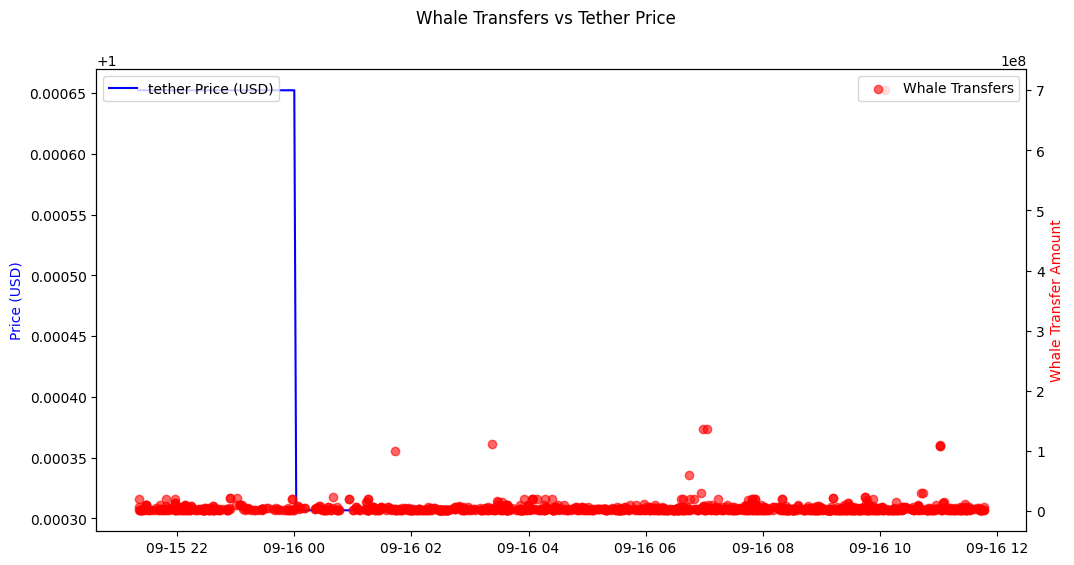

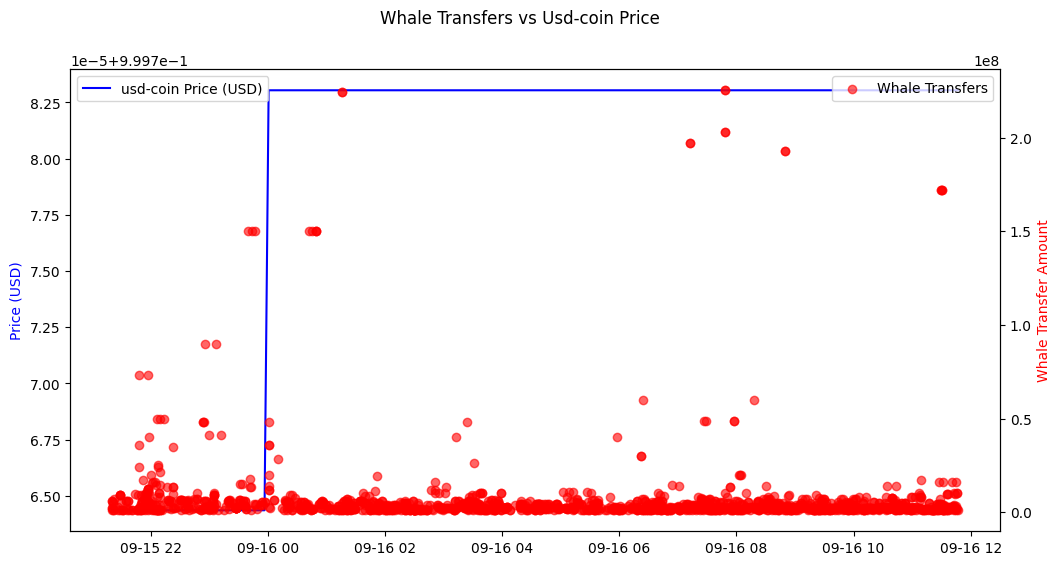

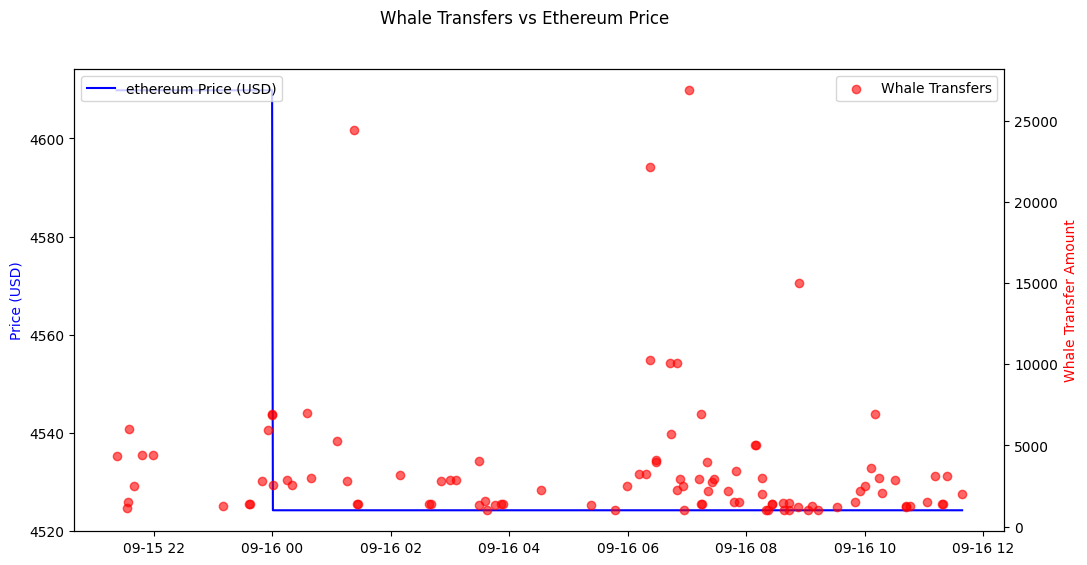

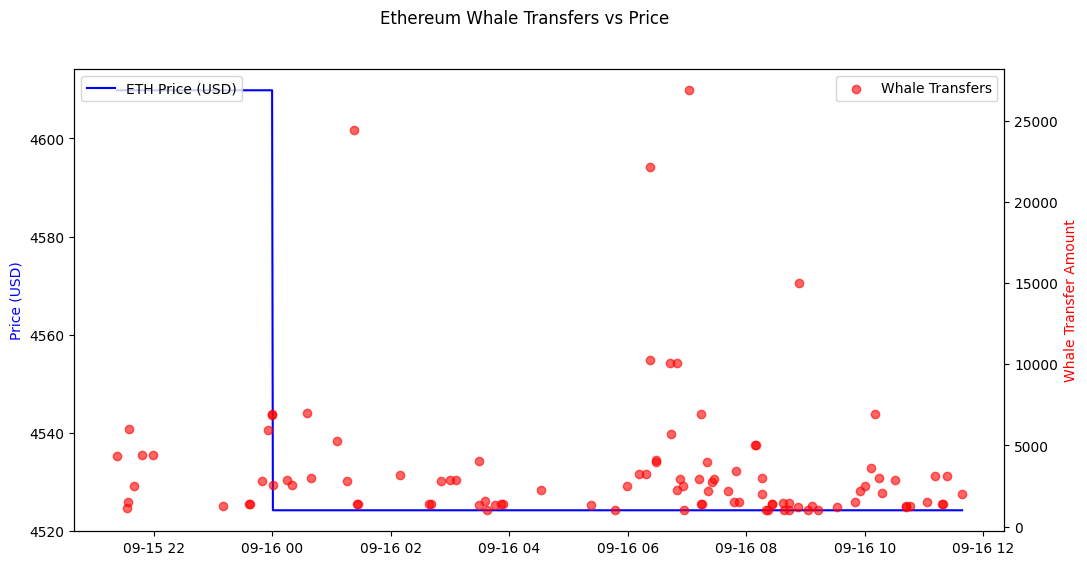

In [12]:

# Whale vs price overlay plots
import matplotlib.pyplot as plt

def plot_whale_overlays(merged_df):
    """
    Generates whale vs price overlay plots for all unique tokens in merged_df.
    """
    unique_tokens = merged_df["token"].dropna().unique()

    for token_name in unique_tokens:
        token_data = merged_df[merged_df["token"] == token_name]

        if token_data.empty:
            continue  # skip tokens with no data

        fig, ax1 = plt.subplots(figsize=(12, 6))

        # Plot price as a line
        ax1.plot(token_data["timestamp"], token_data["price_usd"], 
                 color="blue", label=f"{token_name} Price (USD)")
        ax1.set_ylabel("Price (USD)", color="blue")

        # Plot whale transfers as scatter
        ax2 = ax1.twinx()
        ax2.scatter(token_data["timestamp"], token_data["amount"], 
                    color="red", alpha=0.6, label="Whale Transfers")
        ax2.set_ylabel("Whale Transfer Amount", color="red")

        # Titles & legends
        fig.suptitle(f"Whale Transfers vs {token_name.capitalize()} Price")
        ax1.legend(loc="upper left")
        ax2.legend(loc="upper right")

        plt.show()

# Example usage:
plot_whale_overlays(merged)

# Example: filter for ETH
eth_data = merged[merged["token"] == "ethereum"]

# Plot overlay
fig, ax1 = plt.subplots(figsize=(12,6))

# Price (line)
ax1.plot(eth_data["timestamp"], eth_data["price_usd"], color="blue", label="ETH Price (USD)")
ax1.set_ylabel("Price (USD)", color="blue")

# Whale amount (scatter on secondary y-axis)
ax2 = ax1.twinx()
ax2.scatter(eth_data["timestamp"], eth_data["amount"], color="red", alpha=0.6, label="Whale Transfers")
ax2.set_ylabel("Whale Transfer Amount", color="red")

# Titles & legends
fig.suptitle("Ethereum Whale Transfers vs Price")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()



  exchange                            contract_address  \
0  Binance  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
1  Binance  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
2  Binance  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
3  Binance  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
4  Binance  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   

                 week_start        inflow       outflow  
0 2021-11-01 00:00:00+00:00  5.010000e-10  0.000000e+00  
1 2023-10-23 00:00:00+00:00  0.000000e+00  5.010000e-10  
2 2025-07-07 00:00:00+00:00  4.954011e-11  4.954011e-11  
3 2025-07-28 00:00:00+00:00  1.000000e-10  1.000000e-10  
4 2023-10-23 00:00:00+00:00  0.000000e+00  1.000000e-01  


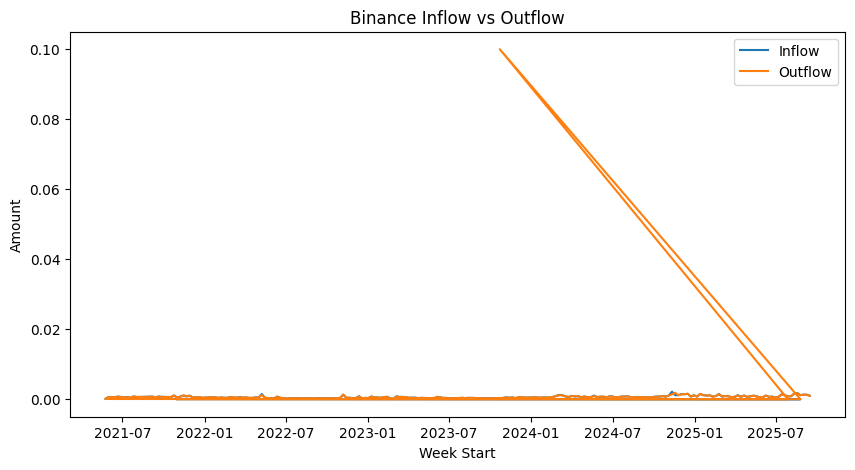

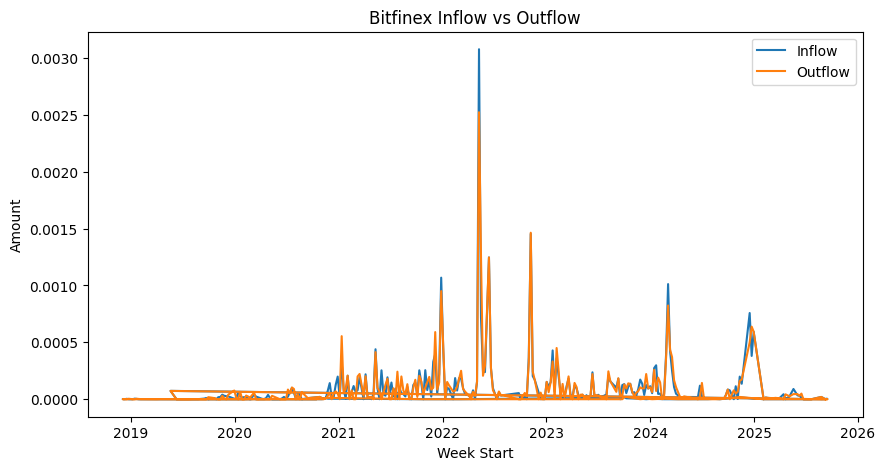

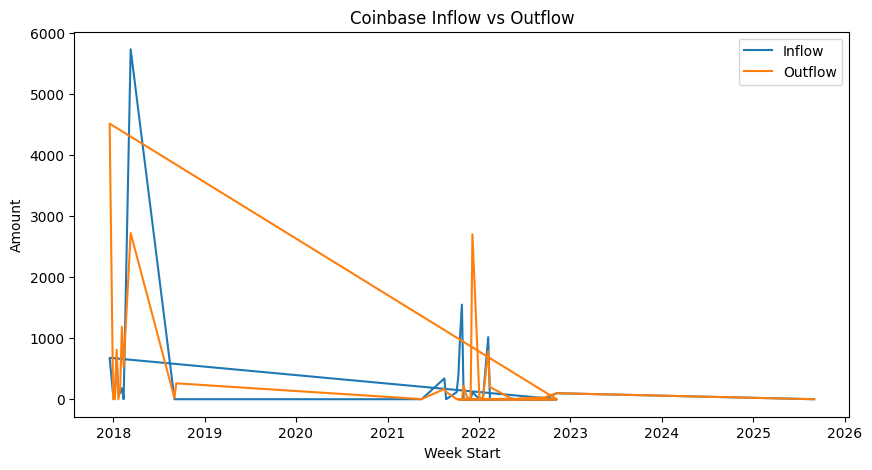

In [13]:
# Inflow vs outflow classification
import requests
import pandas as pd
from datetime import datetime, time, timezone
from dotenv import load_dotenv
import os
import time

# Load Dune API Key and Coingecko API Key
load_dotenv()
API_KEY = os.getenv("DUNE_KEY")
COINGECKO_API_KEY = os.getenv("GECKO_KEY")
# 1. Dune API credentials and query
QUERY_ID = 5781730  # Replace with your actual query ID

headers = {
    "x-dune-api-key": API_KEY
}

# 2. Run the query
run_query_url = f"https://api.dune.com/api/v1/query/{QUERY_ID}/execute"
response = requests.post(run_query_url, headers=headers)
run_data = response.json()
execution_id = run_data['execution_id']

# 3. Poll until the query is finished
status = ''
while status not in ['QUERY_STATE_COMPLETED', 'QUERY_STATE_FAILED']:
    time.sleep(2)
    status_response = requests.get(f"https://api.dune.com/api/v1/execution/{execution_id}/status", headers=headers)
    status_data = status_response.json()
    status = status_data.get('state', '')

# 4. Fetch results
results_url = f"https://api.dune.com/api/v1/execution/{execution_id}/results"
results_response = requests.get(results_url, headers=headers)
results_json = results_response.json()

# 5. Convert to DataFrame
df = pd.DataFrame(results_json['result']['rows'])

# 6. Clean and classify inflow/outflow
df['inflow'] = df['inflow'].astype(float)
df['outflow'] = df['outflow'].astype(float)
df['week_start'] = pd.to_datetime(df['week_start'])

# 7. Example: Aggregate by exchange and token
summary = df.groupby(['exchange', 'contract_address', 'week_start'])[['inflow', 'outflow']].sum().reset_index()
print(summary.head())

# 8. Optional: Visualize inflow vs outflow
import matplotlib.pyplot as plt
for exchange in summary['exchange'].unique():
    ex_data = summary[summary['exchange'] == exchange]
    plt.figure(figsize=(10,5))
    plt.plot(ex_data['week_start'], ex_data['inflow'], label='Inflow')
    plt.plot(ex_data['week_start'], ex_data['outflow'], label='Outflow')
    plt.title(f"{exchange} Inflow vs Outflow")
    plt.xlabel("Week Start")
    plt.ylabel("Amount")
    plt.legend()
    plt.show()

In [14]:
# --- Merge inflow/outflow summary with price data ---
import sqlite3
import pandas as pd

# Load price data from DB
conn = sqlite3.connect('../data/blockchain.db')
prices_df = pd.read_sql('SELECT * FROM prices;', conn)
conn.close()

# Ensure correct types for merging
prices_df['asset'] = prices_df['asset'].astype(str).str.lower()

# Convert timestamp to datetime (if not already)
prices_df['timestamp'] = pd.to_datetime(prices_df['timestamp'], utc=True)

# Create week_start column (start of week for each timestamp)
prices_df['week_start'] = prices_df['timestamp'].dt.to_period('W').apply(lambda r: r.start_time)
prices_df['week_start'] = prices_df['week_start'].dt.tz_localize(None)

# Remove timezone info from summary week_start and timestamp
summary['week_start'] = pd.to_datetime(summary['week_start']).dt.tz_localize(None)
if 'timestamp' in summary.columns:
    summary['timestamp'] = pd.to_datetime(summary['timestamp']).dt.tz_localize(None)

# Normalize contract addresses for mapping
summary['contract_address'] = summary['contract_address'].str.lower()

# Map contract_address to token name
contract_to_token = {
    '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48': 'USDC',
    '0xdac17f958d2ee523a2206206994597c13d831ec7': 'USDT',
    '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2': 'WETH',
    '0x2260fac5e5542a773aa44fbcfedf7c193bc2c599': 'WBTC'
}
summary['token'] = summary['contract_address'].map(contract_to_token)

# Map lowercase asset names to summary tokens
asset_to_token = {
    'usd-coin': 'USDC',
    'tether': 'USDT',
    'ethereum': 'WETH',
    'bitcoin': 'WBTC',
}
prices_df['token'] = prices_df['asset'].map(asset_to_token)

# Print unique values for debugging
print('summary tokens:', summary['token'].unique())
print('prices_df tokens:', prices_df['token'].unique())
print('summary week_start:', summary['week_start'].unique()[:5])
print('prices_df week_start:', prices_df['week_start'].unique()[:5])

# Merge summary with price data on token and week_start
merged_summary = pd.merge(
    summary,
    prices_df,
    how='left',
    left_on=['token', 'week_start'],
    right_on=['token', 'week_start']
)

print(merged_summary.head())

# Now you can analyze inflow/outflow alongside price movements for each token/exchange/week

C:\Users\Muhammad\AppData\Local\Temp\ipykernel_11760\2777031394.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  prices_df['week_start'] = prices_df['timestamp'].dt.to_period('W').apply(lambda r: r.start_time)


summary tokens: ['USDC' 'WETH' 'USDT' 'WBTC']
prices_df tokens: ['WBTC' 'WETH' 'USDT' 'USDC']
summary week_start: <DatetimeArray>
['2021-11-01 00:00:00', '2023-10-23 00:00:00', '2025-07-07 00:00:00',
 '2025-07-28 00:00:00', '2025-08-25 00:00:00']
Length: 5, dtype: datetime64[ns]
prices_df week_start: <DatetimeArray>
['2021-08-09 00:00:00', '2021-08-16 00:00:00', '2021-08-23 00:00:00',
 '2021-08-30 00:00:00', '2021-09-06 00:00:00']
Length: 5, dtype: datetime64[ns]
  exchange                            contract_address week_start  \
0  Binance  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48 2021-11-01   
1  Binance  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48 2021-11-01   
2  Binance  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48 2021-11-01   
3  Binance  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48 2021-11-01   
4  Binance  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48 2021-11-01   

         inflow  outflow token                 timestamp     asset  price_usd  \
0  5.010000e-10      0.0  USDC 2021-